### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records


In [1]:
import seaborn as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Flight Fare Prediction\artifacts\raw.csv")

In [3]:
df.drop(columns=['_id'], axis=1, inplace=True)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
1,GoAir,15/05/2019,Delhi,Cochin,DEL ? BOM ? COK,07:00,12:55,5h 55m,1 stop,No info,7682.0
2,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
3,Air India,3/05/2019,Chennai,Kolkata,MAA ? CCU,11:40,13:55,2h 15m,non-stop,No info,4667.0
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0


In [5]:
df = df.iloc[:10683]


FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [6]:
df.shape

(10683, 11)

In [7]:
#finding the null values
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price              15
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10667 entries, 0 to 10678
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10667 non-null  object 
 1   Date_of_Journey  10667 non-null  object 
 2   Source           10667 non-null  object 
 3   Destination      10667 non-null  object 
 4   Route            10667 non-null  object 
 5   Dep_Time         10667 non-null  object 
 6   Arrival_Time     10667 non-null  object 
 7   Duration         10667 non-null  object 
 8   Total_Stops      10667 non-null  object 
 9   Additional_Info  10667 non-null  object 
 10  Price            10667 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1000.0+ KB


The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [11]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col], dayfirst=True)

# Apply the function to your columns
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)


C:\Users\Abhi\AppData\Local\Temp\ipykernel_6984\1972150440.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], dayfirst=True)
C:\Users\Abhi\AppData\Local\Temp\ipykernel_6984\1972150440.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], dayfirst=True)


In [12]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [13]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

df.drop('Date_of_Journey', axis=1, inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2024-08-25 18:05:00,2024-08-25 23:30:00,5h 25m,1 stop,No info,6218.0,12,5
1,GoAir,Delhi,Cochin,DEL ? BOM ? COK,2024-08-25 07:00:00,2024-08-25 12:55:00,5h 55m,1 stop,No info,7682.0,15,5
2,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-08-25 05:50:00,2024-08-25 13:15:00,7h 25m,2 stops,No info,7662.0,1,5
3,Air India,Chennai,Kolkata,MAA ? CCU,2024-08-25 11:40:00,2024-08-25 13:55:00,2h 15m,non-stop,No info,4667.0,3,5
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,2024-08-25 09:00:00,2024-08-25 11:25:00,2h 25m,non-stop,No info,3873.0,24,6


From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns¶


In [15]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [16]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [17]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [18]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
1,GoAir,Delhi,Cochin,DEL ? BOM ? COK,5h 55m,1 stop,No info,7682.0,15,5,7,0,12,55
2,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
3,Air India,Chennai,Kolkata,MAA ? CCU,2h 15m,non-stop,No info,4667.0,3,5,11,40,13,55
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873.0,24,6,9,0,11,25
5,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,4483.0,3,4,23,55,2,45
6,Jet Airways,Kolkata,Banglore,CCU ? BOM ? BLR,12h 10m,1 stop,In-flight meal not included,9663.0,9,5,21,10,9,20
7,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,5h 30m,1 stop,In-flight meal not included,12373.0,18,5,7,5,12,35
8,Jet Airways,Delhi,Cochin,DEL ? COK,3h 15m,non-stop,In-flight meal not included,7202.0,9,3,11,0,14,15
9,Air India,Banglore,New Delhi,BLR ? BOM ? AMD ? DEL,15h 5m,2 stops,No info,17345.0,1,3,8,50,23,55


In [19]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [20]:
df['Duration']=duration

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
1,GoAir,Delhi,Cochin,DEL ? BOM ? COK,5h 55m,1 stop,No info,7682.0,15,5,7,0,12,55
2,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
3,Air India,Chennai,Kolkata,MAA ? CCU,2h 15m,non-stop,No info,4667.0,3,5,11,40,13,55
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873.0,24,6,9,0,11,25


In [22]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [23]:
df['dur_hour']=df['Duration'].apply(hour)

In [24]:
df['dur_min']=df['Duration'].apply(minutes)

drop_col(df,'Duration')

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
1,GoAir,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,7682.0,15,5,7,0,12,55,5,55
2,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
3,Air India,Chennai,Kolkata,MAA ? CCU,non-stop,No info,4667.0,3,5,11,40,13,55,2,15
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873.0,24,6,9,0,11,25,2,25


In [26]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                float64
journey_day            int32
journey_month          int32
Dep_Time_hour          int32
Dep_Time_min           int32
Arrival_Time_hour      int32
Arrival_Time_min       int32
dur_hour              object
dur_min               object
dtype: object

In [27]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [28]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                float64
journey_day            int32
journey_month          int32
Dep_Time_hour          int32
Dep_Time_min           int32
Arrival_Time_hour      int32
Arrival_Time_min       int32
dur_hour               int64
dur_min                int64
dtype: object

In [29]:
#Finding the categorical value
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [30]:
#Finding the cntinuous value
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

Handling categorical data

We are using two main Encoding Techniques to covert Categorical data into some numerical format

Nominal data -- Data that are not in any order -->one hot encoding

ordinal data -- Data are in order --> labelEncoder

In [31]:
categorical = df[column]

In [32]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
1,GoAir,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info
2,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
3,Air India,Chennai,Kolkata,MAA ? CCU,non-stop,No info
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info


In [33]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3843
IndiGo                               2052
Air India                            1747
Multiple carriers                    1194
SpiceJet                              818
Vistara                               477
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [34]:
# Remove rows with the rare categories
df = df[~df['Airline'].isin(['Jet Airways Business', 'Vistara Premium economy', 'Trujet','Multiple carriers Premium economy'])]


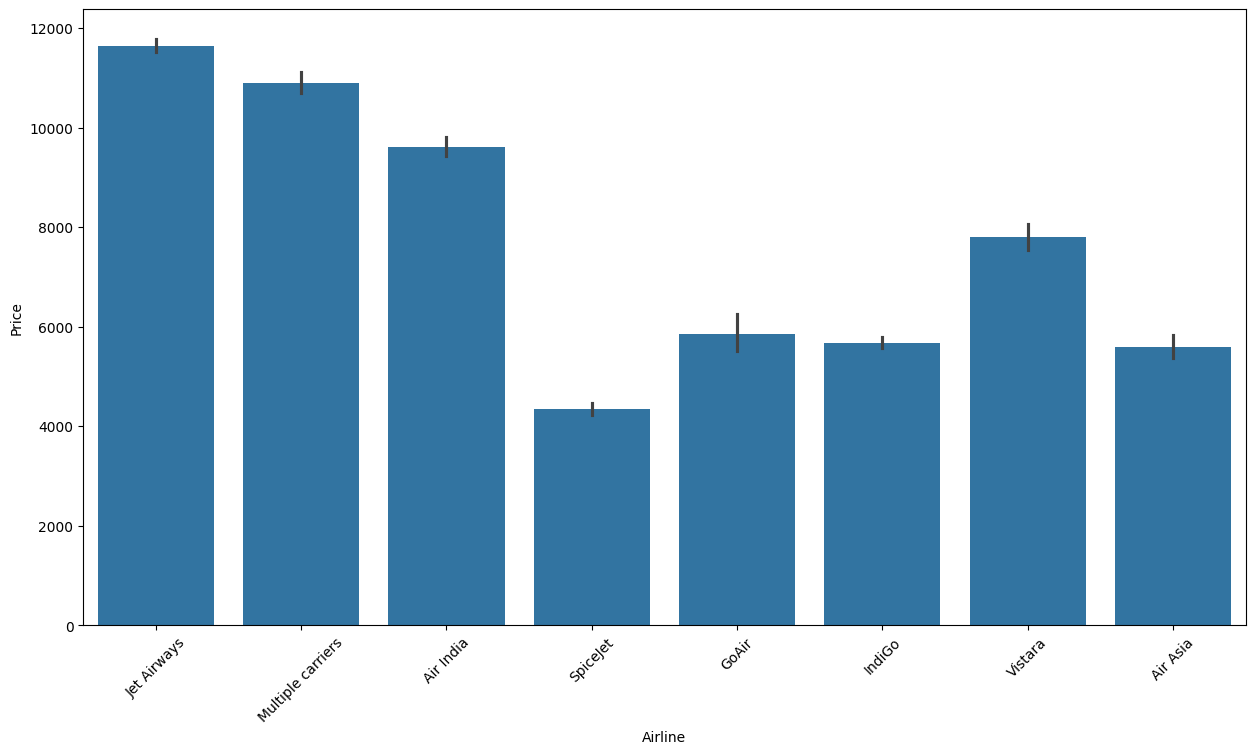

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

<Axes: xlabel='Total_Stops', ylabel='Price'>

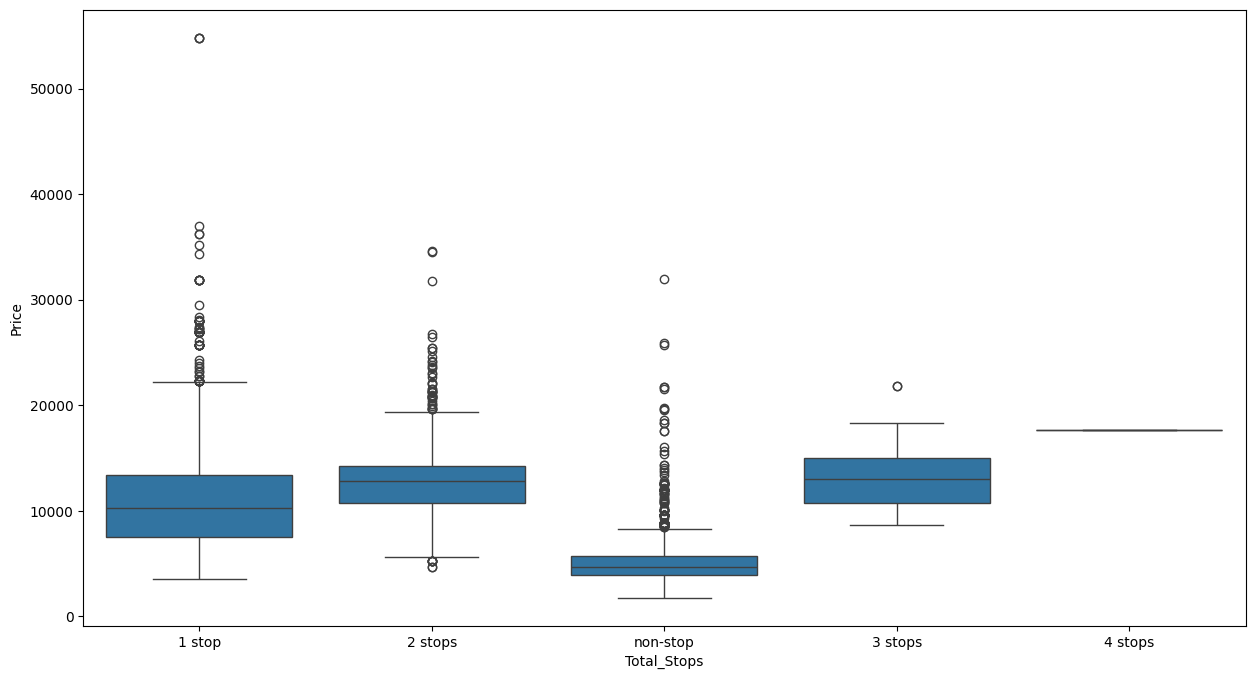

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [37]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [38]:
Airline = Airline.astype(int)

In [39]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [40]:
categorical['Source'].value_counts()

Source
Delhi       4530
Kolkata     2867
Banglore    2193
Mumbai       696
Chennai      381
Name: count, dtype: int64

In [41]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)

source = source.astype(int)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [42]:
categorical['Destination'].value_counts()

Destination
Cochin       4530
Banglore     2867
Delhi        1263
New Delhi     930
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

In [43]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination = destination.astype(int)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,0


In [44]:
# now work on route column
categorical['Route'].value_counts()

Route
DEL ? BOM ? COK          2373
BLR ? DEL                1549
CCU ? BOM ? BLR           978
CCU ? BLR                 723
BOM ? HYD                 620
                         ... 
CCU ? RPR ? HYD ? BLR       1
CCU ? IXZ ? MAA ? BLR       1
CCU ? VTZ ? BLR             1
BOM ? COK ? MAA ? HYD       1
BOM ? BBI ? HYD             1
Name: count, Length: 128, dtype: int64

In [45]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [46]:
drop_col(categorical,'Route')

In [47]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2             10667
Route3             10667
Route4             10667
Route5             10667
dtype: int64

In [48]:
for i in ['Route2','Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_6984\3983090834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical[i].fillna('None',inplace=True)
C:\Users\Abhi\AppData\Local\Temp\ipykernel_6984\3983090834.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  categorical[i].fillna('None',inplace=True)


In [49]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [50]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 128 categories
Route2 has total 1 categories
Route3 has total 1 categories
Route4 has total 1 categories
Route5 has total 1 categories


In [51]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [52]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [53]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Kolkata,Banglore,1 stop,No info,91,0,0,0,0
1,GoAir,Delhi,Cochin,1 stop,No info,104,0,0,0,0
2,Air India,Kolkata,Banglore,2 stops,No info,84,0,0,0,0
3,Air India,Chennai,Kolkata,non-stop,No info,127,0,0,0,0
4,SpiceJet,Kolkata,Banglore,non-stop,No info,64,0,0,0,0


In [54]:
drop_col(categorical,'Additional_Info')

In [55]:
categorical['Total_Stops'].unique()

array(['1 stop', '2 stops', 'non-stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [57]:
categorical['Total_Stops']

0        1
1        1
2        2
3        0
4        0
        ..
10672    0
10673    2
10674    0
10675    0
10678    0
Name: Total_Stops, Length: 10667, dtype: int64

In [58]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

In [59]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [60]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,1,91,0,0,0,0,0,0,1,0,...,0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0
1,1,104,0,0,0,0,0,1,0,0,...,0,7682.0,15.0,5.0,7.0,0.0,12.0,55.0,5.0,55.0
2,2,84,0,0,0,0,1,0,0,0,...,0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0
3,0,127,0,0,0,0,1,0,0,0,...,0,4667.0,3.0,5.0,11.0,40.0,13.0,55.0,2.0,15.0
4,0,64,0,0,0,0,0,0,0,0,...,0,3873.0,24.0,6.0,9.0,0.0,11.0,25.0,2.0,25.0


In [61]:
final_df.isnull().sum()

Total_Stops                           0
Route1                                0
Route2                                0
Route3                                0
Route4                                0
Route5                                0
Air India                             0
GoAir                                 0
IndiGo                                0
Jet Airways                           0
Jet Airways Business                  0
Multiple carriers                     0
Multiple carriers Premium economy     0
SpiceJet                              0
Trujet                                0
Vistara                               0
Vistara Premium economy               0
Chennai                               0
Delhi                                 0
Kolkata                               0
Mumbai                                0
Cochin                                0
Delhi                                 0
Hyderabad                             0
Kolkata                               0


In [62]:
final_df.dropna(inplace=True)

In [63]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

### Seprate the dataset in X and Y columns

In [65]:
X=final_df.drop('Price',axis=1)
y=df['Price']

### Feature Selection

It is about finding the best feature and having good relation with independent variable

Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [66]:
from sklearn.feature_selection import mutual_info_classif

In [67]:
mutual_info_classif(X,y)

array([1.93204568, 3.44423042, 0.01016001, 0.        , 0.        ,
       0.        , 0.66463628, 0.08624515, 0.61561087, 0.86691577,
       0.00739499, 0.52339872, 0.00396159, 0.30862349, 0.        ,
       0.19874784, 0.        , 0.1583375 , 1.3630193 , 0.83351274,
       0.28866012, 1.34841226, 0.40864134, 0.28067943, 0.1641644 ,
       0.34404988, 0.89675224, 1.65149029, 1.51336034, 1.29004773,
       1.92378525, 1.60320887, 1.76907145, 1.14232487])

In [68]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.893127
Route1,3.435150
Route2,0.003358
Route3,0.000000
Route4,0.000000
Route5,0.000000
Air India,0.652230
GoAir,0.100771
IndiGo,0.613851
Jet Airways,0.864981


In [69]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.899547
Route1,3.432686
Route2,0.000000
Route3,0.000000
Route4,0.002893
Route5,0.002912
Air India,0.720392
GoAir,0.078418
IndiGo,0.633012
Jet Airways,0.896271


In [70]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route1,3.432686
Total_Stops,1.899547
Arrival_Time_hour,1.865256
dur_hour,1.772391
journey_month,1.669612
Arrival_Time_min,1.624946
Dep_Time_hour,1.523391
Cochin,1.356987
Delhi,1.339276
Dep_Time_min,1.291315


In [75]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [79]:
print("Data types of X_train:", X_train.dtypes)
print("Data types of X_test:", X_test.dtypes)

Data types of X_train: Total_Stops                            int64
Route1                                 int64
Route2                                 int64
Route3                                 int64
Route4                                 int64
Route5                                 int64
Air India                              int64
GoAir                                  int64
IndiGo                                 int64
Jet Airways                            int64
Jet Airways Business                   int64
Multiple carriers                      int64
Multiple carriers Premium economy      int64
SpiceJet                               int64
Trujet                                 int64
Vistara                                int64
Vistara Premium economy                int64
Chennai                                int64
Delhi                                  int64
Kolkata                                int64
Mumbai                                 int64
Cochin                          

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8515, 34)
(2129, 34)
(8515,)
(2129,)


In [77]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2760.6306
- Mean Absolute Error: 1928.9598
- R2 Score: 0.6160
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2937.9779
- Mean Absolute Error: 2003.0693
- R2 Score: 0.5688


Lasso
Model performance for Training set
- Root Mean Squared Error: 2761.0570
- Mean Absolute Error: 1928.2904
- R2 Score: 0.6159
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2939.1574
- Mean Absolute Error: 2001.5491
- R2 Score: 0.5684


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2060.2654
- Mean Absolute Error: 1323.1299
- R2 Score: 0.7861
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2711.2590
- Mean Absolute Error: 1688.8426
- R2 Score: 0.6328


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 803.2806
- Mean Absolute Error: 315

In [82]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Random Forest Regressor,0.787851
3,Decision Tree,0.677960
2,K-Neighbors Regressor,0.632757
0,Linear Regression,0.568771
1,Lasso,0.568424
5,AdaBoost Regressor,0.440608


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize and fit the model
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)

# Calculate the R2 score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 78.94


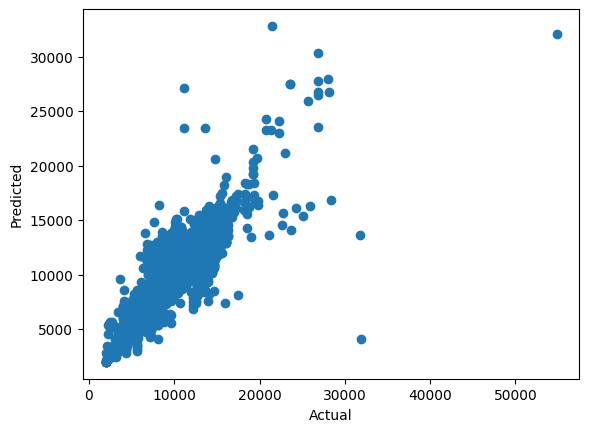

In [89]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [90]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1115,12723.0,12172.430000,550.570000
9360,7438.0,9073.040000,-1635.040000
4260,13941.0,11540.405333,2400.594667
9603,13764.0,12282.119726,1481.880274
2593,3841.0,4120.139667,-279.139667
...,...,...,...
8314,7198.0,12562.807500,-5364.807500
3044,6838.0,6239.340000,598.660000
3623,3859.0,3782.840000,76.160000
7249,3419.0,3682.530000,-263.530000


### Hypertunning the model

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [94]:
# best parameter
rf_random.best_params_

{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

In [97]:
#predicting the values
prediction = rf_random.predict(X_test)

In [98]:
r2_score(y_test,prediction)

0.7824794283558528

After hypertuning,the accuracy decreases .